Быстрый старт в анализ данных
с помощью Pandas и Scikit-learn, а также numpy и matplotlib

numpy – матричные операции
matplotlib – научная графика
pandas – таблицы (DataFrame) для анализа данных
scikit-learn – алгоритмы машинного обучения

In [1]:
import numpy as np             
import matplotlib.pyplot as plt 
import matplotlib
import pandas as pd            
import seaborn as sns           
import sklearn 

### 0.Описание задачи

Этот набор данных содержит зарплаты 5,5 тыс. футболистов включая следующие столбцы:
- позиция
- игрок
- команда
- возраст
- общая стоимость
- avg_year  (средняя строимость за год)
- total_guaranteed  (гарантированная зарплата по контракту в команде)
- fully_guaranteed  (нижний предел зарплаты(индивидуальный нижний предел на рынке) независимо от команды)
- free_agency (срок окончания контракта и его тип)

Необходимо определить на какой позиции будет стоять игрок (задача классификации)  
Считываем данные и печатаем их для удобства

### 1.Чтение данных из файла

In [2]:
data_train = pd.read_csv('./football_salaries.csv', sep = ',', engine = 'python')
data_train.head()

,position,player,team,age,total_value,avg_year,total_guaranteed,fully_guaranteed,free_agency
0,right-tackle,Trent Brown,Raiders,26,66000000,16500000,36250000,36250000,2023 UFA
1,right-tackle,Ja’Wuan James,Broncos,27,51000000,12750000,32000000,27000000,2023 UFA
2,right-tackle,Lane Johnson,Eagles,29,56250000,11250000,35500000,20862242,2022 Void
3,right-tackle,Ricky Wagner,Lions,30,47500000,9500000,29500000,17500000,2022 UFA
4,right-tackle,Rob Havenstein,Rams,26,32500000,8125000,16226365,9976365,2023 UFA


In [3]:
data_train.tail()

,position,player,team,age,total_value,avg_year,total_guaranteed,fully_guaranteed,free_agency
5518,defensive-back,Trey Johnson,Broncos,25,495000,495000,0,0,2020 ERFA
5519,defensive-back,Rolan Milligan,Colts,25,975000,487500,0,0,2020 ERFA
5520,defensive-back,Jeremy Reaves,Redskins,23,975000,487500,0,0,2020 ERFA
5521,defensive-back,Dallin Leavitt,Raiders,25,975000,487500,0,0,2020 ERFA
5522,defensive-back,Jake Carlock,Giants,23,1762500,20000,0,20000,2022 RFA


### 2. Визуализация данных и вычисление основных характеристик

Рассплитим последним столбец, который содержит в себе сразу двойную информацию: год окончания контракта и тип контракта. Получим категориальный признак type_contract.

In [4]:
data_train[['year_grad','type_contract']] = data_train['free_agency'].str.split( expand=True)
data_train = data_train.drop(['free_agency'], axis=1)
data_train.head()

,position,player,team,age,total_value,avg_year,total_guaranteed,fully_guaranteed,year_grad,type_contract
0,right-tackle,Trent Brown,Raiders,26,66000000,16500000,36250000,36250000,2023,UFA
1,right-tackle,Ja’Wuan James,Broncos,27,51000000,12750000,32000000,27000000,2023,UFA
2,right-tackle,Lane Johnson,Eagles,29,56250000,11250000,35500000,20862242,2022,Void
3,right-tackle,Ricky Wagner,Lions,30,47500000,9500000,29500000,17500000,2022,UFA
4,right-tackle,Rob Havenstein,Rams,26,32500000,8125000,16226365,9976365,2023,UFA


In [5]:
data_train.tail()

,position,player,team,age,total_value,avg_year,total_guaranteed,fully_guaranteed,year_grad,type_contract
5518,defensive-back,Trey Johnson,Broncos,25,495000,495000,0,0,2020,ERFA
5519,defensive-back,Rolan Milligan,Colts,25,975000,487500,0,0,2020,ERFA
5520,defensive-back,Jeremy Reaves,Redskins,23,975000,487500,0,0,2020,ERFA
5521,defensive-back,Dallin Leavitt,Raiders,25,975000,487500,0,0,2020,ERFA
5522,defensive-back,Jake Carlock,Giants,23,1762500,20000,0,20000,2022,RFA


Отобразим основные характеристики каждого из параметров для ненормированных данных и 
матрицу ковариаций


In [6]:
data_train.describe()

,age,total_value,avg_year,total_guaranteed,fully_guaranteed
count,5523.000000,5.523000e+03,5.523000e+03,5.523000e+03,5.523000e+03
mean,187.901141,7.786235e+06,2.250830e+06,3.803250e+06,3.095552e+06
std,549.109622,1.590476e+07,3.573839e+06,9.728381e+06,7.322756e+06
min,0.000000,1.050000e+05,0.000000e+00,0.000000e+00,0.000000e+00
25%,24.000000,1.350000e+06,5.853330e+05,0.000000e+00,0.000000e+00
50%,25.000000,2.075000e+06,6.900000e+05,9.000000e+04,8.705600e+04
75%,28.000000,4.673694e+06,2.000000e+06,1.600000e+06,1.500000e+06
max,2020.000000,1.500000e+08,3.500000e+07,1.070000e+08,9.450000e+07


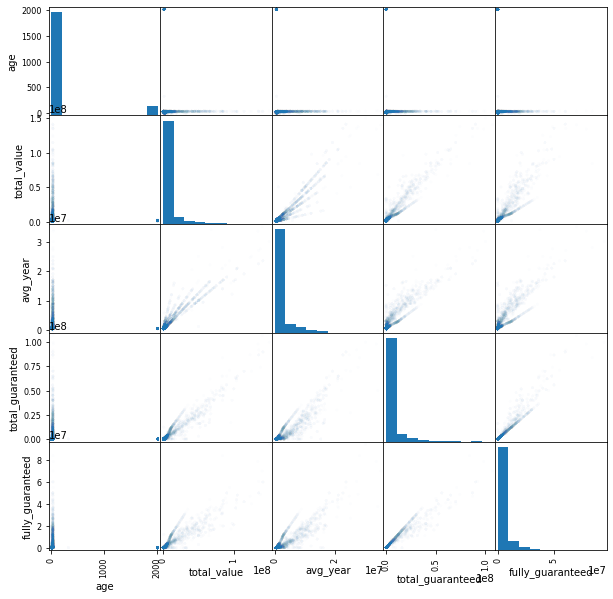

In [7]:
from pandas.plotting import scatter_matrix
scatter_matrix(data_train, alpha = .01, figsize = (10, 10))
pass

In [8]:
data_train['age'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005       0.0
0.010       0.0
0.050       0.0
0.100      21.0
0.500      25.0
0.900      33.0
0.950    2020.0
0.990    2020.0
0.995    2020.0
Name: age, dtype: float64

Нетрудно заметить, что в пункте age в каких-то из строк находится ошибка, так как у игрока не может быть возраст 2020, ровно также как и не может быть возраст 0. Очевидно, что просто взять и удалить эти строки нельзя, так как мы лишимся почти 20% данных (это можно наблюдать при деления всего распределения возрастов на квантили). Для борьбы с такими выбросами заменим все числа больше 48 и меньше 16 ( самый старый и молодой игрок в американский футбол за всю историю) в столбце age на NaN, и в следующем пункте обработаем эти данные, заменив на медианный возраст. 

In [9]:
data_train.loc[data_train[
    (data_train['age'] > 48) | (data_train['age'] < 16)].index, "age"] = np.nan

In [10]:
data_train['age'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005    22.0
0.010    22.0
0.050    23.0
0.100    23.0
0.500    25.0
0.900    30.0
0.950    31.0
0.990    35.0
0.995    37.0
Name: age, dtype: float64

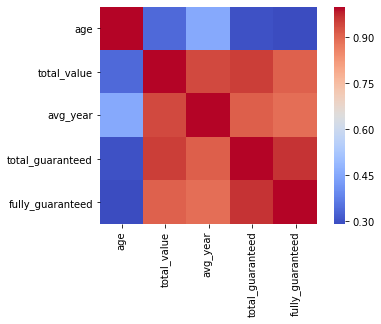

In [11]:
corr_mat = data_train.corr()
sns.heatmap(corr_mat, square=True, cmap='coolwarm')
pass

In [12]:
corr_mat.where(np.triu(corr_mat > 0.0, k=1)).stack().sort_values(ascending=False)

total_guaranteed  fully_guaranteed    0.964839
total_value       total_guaranteed    0.955221
                  avg_year            0.939605
avg_year          total_guaranteed    0.911433
total_value       fully_guaranteed    0.911147
avg_year          fully_guaranteed    0.891121
age               avg_year            0.453844
                  total_value         0.339023
                  total_guaranteed    0.300218
                  fully_guaranteed    0.290094
dtype: float64

На данной диаграмме видно, что признаки, связанные с ценами, сильно коррелируют. К примеру, если мы возьмем total_value(стоимость контракта игрока) и total_guaranteed (гарантированная зарплата игрока в команде) то увидим, что коэффициент корреляции порядка 0,9 и это полностью соответсвует реальности: Гарантированная зарплата, зачастую высчитывается как 50-70% от стоимости контракта - это та сумма которую получит игрок, даже если не выйдет на поле ни в одной из игр (из-за травм или еще каких-то объективных причин).

### 3.Обработка пропущенных значений

In [13]:
data_train.isna().sum()
#data_train['free_agency'].value_counts()

position               0
player                 0
team                   0
age                 1009
total_value            0
avg_year               0
total_guaranteed       0
fully_guaranteed       0
year_grad              5
type_contract          5
dtype: int64

Заполним медианами пропущенные значения в столбцах, соответствующих числовым признакам.
Пропущенные значения в столбцах, соответствующих категориальным признакам, заполним модой.

In [14]:
data_train['age'].fillna(data_train['age'].median(axis = 0), axis=0 , inplace=True)
data_train['year_grad'].fillna(data_train['year_grad'].median(axis = 0), axis=0 , inplace=True)
data_train['type_contract'].fillna(data_train['type_contract'].mode().iloc[0], inplace=True)
data_train.isna().sum()

position            0
player              0
team                0
age                 0
total_value         0
avg_year            0
total_guaranteed    0
fully_guaranteed    0
year_grad           0
type_contract       0
dtype: int64

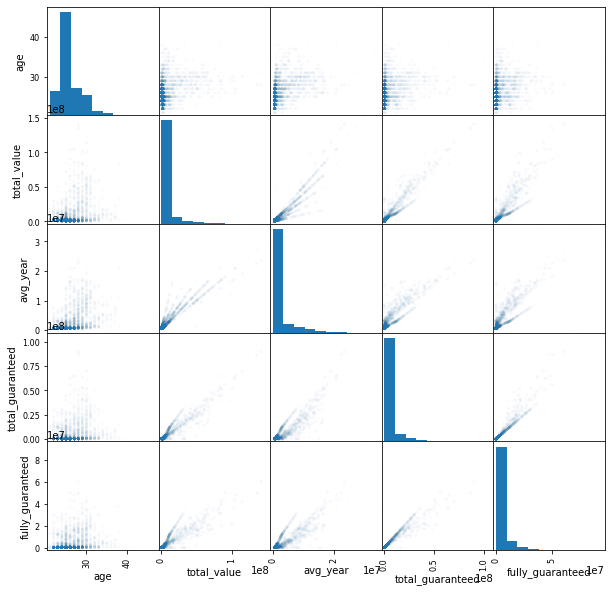

In [15]:
from pandas.plotting import scatter_matrix
scatter_matrix(data_train, alpha = .01, figsize = (10, 10))
pass

### Борьба с несбалансированностью классов.

В представленной выборке есть классы представленные малым количеством элементов. Это можно увидеть в таблице ниже.

In [16]:
data_train['position'].value_counts()

defensive-back             549
offensive-line             489
defensive-line             426
wide-receiver              383
linebacker                 369
cornerback                 315
traditional-linebacker     300
interior-defensive-line    271
safety                     233
edge-rusher                218
running-back               197
tight-end                  195
inside-linebacker          171
4-3-defensive-end          153
4-3-defensive-tackle       142
4-3-outside-linebacker     129
quarterback                119
left-tackle                111
right-guard                108
right-tackle               100
left-guard                  97
3-4-defensive-end           96
center                      90
3-4-outside-linebacker      67
punter                      46
kicker                      44
long-snapper                43
3-4-defensive-tackle        40
fullback                    22
Name: position, dtype: int64

Так как у нас данные несбалансированные, то сделаем так, чтобы игроков каждой позиции было одинаковое количество, а именно 549 - самая популярная позиция игрока. Для этого применим оверсэмплинг

In [17]:
positionPlayer = data_train['position']
position_col = data_train['position']
num_0 = position_col.value_counts()['defensive-back']
print(num_0)
data_train = pd.concat([ data_train[data_train['position']=='defensive-back'],
                                data_train[data_train['position']=='offensive-line'].sample(num_0, replace=True),
                                data_train[data_train['position']=='defensive-line'].sample(num_0, replace=True),
                                data_train[data_train['position']=='wide-receiver'].sample(num_0, replace=True),
                                data_train[data_train['position']=='linebacker'].sample(num_0, replace=True),
                                data_train[data_train['position']=='cornerback'].sample(num_0, replace=True),
                                data_train[data_train['position']=='traditional-linebacker'].sample(num_0, replace=True),
                                data_train[data_train['position']=='interior-defensive-line'].sample(num_0, replace=True),
                                data_train[data_train['position']=='safety'].sample(num_0, replace=True),
                                data_train[data_train['position']=='edge-rusher'].sample(num_0, replace=True),
                                data_train[data_train['position']=='running-back'].sample(num_0, replace=True),
                                data_train[data_train['position']=='tight-end'].sample(num_0, replace=True),
                                data_train[data_train['position']=='inside-linebacker'].sample(num_0, replace=True),
                                data_train[data_train['position']=='4-3-defensive-end'].sample(num_0, replace=True),
                                data_train[data_train['position']=='4-3-defensive-tackle'].sample(num_0, replace=True),
                                data_train[data_train['position']=='4-3-outside-linebacker'].sample(num_0, replace=True),
                                data_train[data_train['position']=='quarterback'].sample(num_0, replace=True),
                                data_train[data_train['position']=='left-tackle'].sample(num_0, replace=True),
                                data_train[data_train['position']=='right-guard'].sample(num_0, replace=True),
                                data_train[data_train['position']=='right-tackle'].sample(num_0, replace=True),
                                data_train[data_train['position']=='left-guard'].sample(num_0, replace=True),
                                data_train[data_train['position']=='3-4-defensive-end'].sample(num_0, replace=True),
                                data_train[data_train['position']=='center'].sample(num_0, replace=True),
                                data_train[data_train['position']=='3-4-outside-linebacker'].sample(num_0, replace=True),
                                data_train[data_train['position']=='punter'].sample(num_0, replace=True),
                                data_train[data_train['position']=='kicker'].sample(num_0, replace=True),
                                data_train[data_train['position']=='long-snapper'].sample(num_0, replace=True),
                                data_train[data_train['position']=='3-4-defensive-tackle'].sample(num_0, replace=True),
                                data_train[data_train['position']=='fullback'].sample(num_0, replace=True)])
# dt = data_train.tail(549)
print(data_train['position'].value_counts())

549
wide-receiver              549
3-4-defensive-end          549
edge-rusher                549
left-guard                 549
long-snapper               549
4-3-defensive-tackle       549
cornerback                 549
3-4-outside-linebacker     549
tight-end                  549
left-tackle                549
safety                     549
right-tackle               549
center                     549
quarterback                549
right-guard                549
linebacker                 549
running-back               549
inside-linebacker          549
4-3-outside-linebacker     549
3-4-defensive-tackle       549
kicker                     549
defensive-line             549
interior-defensive-line    549
traditional-linebacker     549
defensive-back             549
4-3-defensive-end          549
punter                     549
offensive-line             549
fullback                   549
Name: position, dtype: int64


### 4.Обработка категориальных признаков

Далее для работы нужно бинаризировать номинальные признаки. Для этого сначала 
посмотрим какие значения могут принимать категориальные признаки:

In [18]:
data_train['type_contract'].unique()

array(['UFA', 'Void', 'ERFA', 'RFA'], dtype=object)

In [19]:
data_train['team'].unique()

array(['Dolphins', 'Redskins', 'Jets', 'Vikings', 'Cardinals', 'Chiefs',
       'Bears', 'Ravens', 'Falcons', 'Jaguars', 'Patriots', 'Giants',
       'Titans', 'Broncos', 'Lions', 'Chargers', 'Bengals', 'Raiders',
       'Texans', 'Rams', '49ers', 'Steelers', 'Packers', 'Eagles',
       'Browns', 'Colts', 'Panthers', 'Bills', 'Saints', 'Seahawks',
       'Buccaneers', 'Cowboys'], dtype=object)

Теперь бинаризуем их:

In [20]:
agency_dummies = pd.get_dummies(data_train['type_contract'])
agency_dummies.head()

,ERFA,RFA,UFA,Void
893,0,0,1,0
1014,0,0,1,0
1015,0,0,1,0
1016,0,0,1,0
1017,0,0,1,0


In [21]:
team_dummies = pd.get_dummies(data_train['team'])
team_dummies.head()

,49ers,Bears,Bengals,Bills,Broncos,Browns,Buccaneers,Cardinals,Chargers,Chiefs,...,Raiders,Rams,Ravens,Redskins,Saints,Seahawks,Steelers,Texans,Titans,Vikings
893,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1014,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1016,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1017,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


Добавим эти dummy-столбцы к таблице и удалим категориальные столбцы:

In [22]:
data_train = pd.concat((data_train,team_dummies), axis=1)
data_train = pd.concat((data_train,agency_dummies), axis=1)

In [23]:
position_col = data_train['position']
data=data_train.copy
data_train = data_train.drop(['team'], axis=1)
data_train = data_train.drop(['position'], axis=1)
data_train = data_train.drop(['player'], axis=1)
data_train = data_train.drop(['type_contract'], axis=1)
data_train = data_train.drop(['year_grad'], axis=1)
# data_train = data_train.drop(['age'], axis=1)
data_train.head()

,age,total_value,avg_year,total_guaranteed,fully_guaranteed,49ers,Bears,Bengals,Bills,Broncos,...,Saints,Seahawks,Steelers,Texans,Titans,Vikings,ERFA,RFA,UFA,Void
893,26.0,75250000,15050000,46000000,27185641,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1014,32.0,75000000,15000000,50000000,36500000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1015,29.0,72500000,14500000,45000000,34000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1016,29.0,70100000,14020000,40826000,20026000,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1017,29.0,70050000,14010000,48000000,16250000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [24]:
data_train.tail()

,age,total_value,avg_year,total_guaranteed,fully_guaranteed,49ers,Bears,Bengals,Bills,Broncos,...,Saints,Seahawks,Steelers,Texans,Titans,Vikings,ERFA,RFA,UFA,Void
1758,25.0,495000,495000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1266,27.0,6975000,1743750,1750000,1750000,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1605,27.0,2469680,617420,129680,129680,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1262,28.0,21000000,5250000,9750000,7000000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1604,26.0,2504308,626077,164308,164308,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


### 5.Нормализация признаков

Перед применением алгоритмов машинного обучения количественные признаки полезно нормализовать.

Наиболее часто используют один из двух следующих способов:
- приведение к отрезку $[0,1]$ - это линейное преобразование, приводящее все значения к заданному отрезку;
- стандартизация - линейное преобразование, приводящее все значения к нулевому среднему и единичному стандартному отклонению.

Выполним стандартизацию всех признаков:

In [25]:
data_stand = (data_train - data_train.mean(axis = 0))/data_train.std(axis = 0)
data_stand.head()

,age,total_value,avg_year,total_guaranteed,fully_guaranteed,49ers,Bears,Bengals,Bills,Broncos,...,Saints,Seahawks,Steelers,Texans,Titans,Vikings,ERFA,RFA,UFA,Void
893,-0.052009,4.129824,3.497842,4.172375,3.156534,-0.175738,-0.190221,-0.16878,-0.183379,-0.196168,...,-0.167,-0.170932,-0.191282,-0.195476,-0.183744,-0.177628,-0.426863,-0.593944,0.857666,-0.094862
1014,1.989987,4.114478,3.484154,4.568670,4.379883,-0.175738,-0.190221,-0.16878,-0.183379,-0.196168,...,-0.167,-0.170932,-0.191282,-0.195476,-0.183744,-0.177628,-0.426863,-0.593944,0.857666,-0.094862
1015,0.968989,3.961024,3.347272,4.073301,4.051533,-0.175738,-0.190221,-0.16878,-0.183379,-0.196168,...,-0.167,-0.170932,-0.191282,-0.195476,-0.183744,-0.177628,-0.426863,-0.593944,0.857666,-0.094862
1016,0.968989,3.813707,3.215865,3.659767,2.216187,-0.175738,-0.190221,-0.16878,-0.183379,-0.196168,...,-0.167,-0.170932,-0.191282,-0.195476,-0.183744,5.629387,-0.426863,-0.593944,0.857666,-0.094862
1017,0.968989,3.810638,3.213127,4.370523,1.720247,-0.175738,-0.190221,-0.16878,-0.183379,-0.196168,...,-0.167,-0.170932,-0.191282,-0.195476,-0.183744,-0.177628,-0.426863,-0.593944,0.857666,-0.094862


In [26]:
data_stand.tail()

,age,total_value,avg_year,total_guaranteed,fully_guaranteed,49ers,Bears,Bengals,Bills,Broncos,...,Saints,Seahawks,Steelers,Texans,Titans,Vikings,ERFA,RFA,UFA,Void
1758,-0.392341,-0.458785,-0.486796,-0.385023,-0.414029,-0.175738,-0.190221,-0.16878,-0.183379,-0.196168,...,-0.167,-0.170932,-0.191282,-0.195476,-0.183744,-0.177628,2.342526,-0.593944,-1.165882,-0.094862
1266,0.288324,-0.061030,-0.144933,-0.211644,-0.184184,-0.175738,-0.190221,-0.16878,-0.183379,-0.196168,...,-0.167,-0.170932,5.227568,-0.195476,-0.183744,-0.177628,-0.426863,-0.593944,0.857666,-0.094862
1605,0.288324,-0.337575,-0.453282,-0.372175,-0.396997,-0.175738,-0.190221,-0.16878,-0.183379,-0.196168,...,-0.167,-0.170932,-0.191282,-0.195476,-0.183744,-0.177628,-0.426863,-0.593944,0.857666,-0.094862
1262,0.628657,0.799852,0.814953,0.580947,0.505351,5.689932,-0.190221,-0.16878,-0.183379,-0.196168,...,-0.167,-0.170932,-0.191282,-0.195476,-0.183744,-0.177628,-0.426863,-0.593944,0.857666,-0.094862
1604,-0.052009,-0.335450,-0.450912,-0.368744,-0.392449,-0.175738,-0.190221,-0.16878,-0.183379,5.097363,...,-0.167,-0.170932,-0.191282,-0.195476,-0.183744,-0.177628,-0.426863,-0.593944,0.857666,-0.094862


### 6. Разбиваем выборку на обучающую и тестовую

Для предсказания на какой позиции будет стоять игрок, будем использовать все 
входные признаки(кроме имени игрока):

In [27]:
data_stand.head()

,age,total_value,avg_year,total_guaranteed,fully_guaranteed,49ers,Bears,Bengals,Bills,Broncos,...,Saints,Seahawks,Steelers,Texans,Titans,Vikings,ERFA,RFA,UFA,Void
893,-0.052009,4.129824,3.497842,4.172375,3.156534,-0.175738,-0.190221,-0.16878,-0.183379,-0.196168,...,-0.167,-0.170932,-0.191282,-0.195476,-0.183744,-0.177628,-0.426863,-0.593944,0.857666,-0.094862
1014,1.989987,4.114478,3.484154,4.568670,4.379883,-0.175738,-0.190221,-0.16878,-0.183379,-0.196168,...,-0.167,-0.170932,-0.191282,-0.195476,-0.183744,-0.177628,-0.426863,-0.593944,0.857666,-0.094862
1015,0.968989,3.961024,3.347272,4.073301,4.051533,-0.175738,-0.190221,-0.16878,-0.183379,-0.196168,...,-0.167,-0.170932,-0.191282,-0.195476,-0.183744,-0.177628,-0.426863,-0.593944,0.857666,-0.094862
1016,0.968989,3.813707,3.215865,3.659767,2.216187,-0.175738,-0.190221,-0.16878,-0.183379,-0.196168,...,-0.167,-0.170932,-0.191282,-0.195476,-0.183744,5.629387,-0.426863,-0.593944,0.857666,-0.094862
1017,0.968989,3.810638,3.213127,4.370523,1.720247,-0.175738,-0.190221,-0.16878,-0.183379,-0.196168,...,-0.167,-0.170932,-0.191282,-0.195476,-0.183744,-0.177628,-0.426863,-0.593944,0.857666,-0.094862


In [28]:
X = data_stand.copy()
y = position_col

In [29]:
position_col.value_counts()

wide-receiver              549
3-4-defensive-end          549
edge-rusher                549
left-guard                 549
long-snapper               549
4-3-defensive-tackle       549
cornerback                 549
3-4-outside-linebacker     549
tight-end                  549
left-tackle                549
safety                     549
right-tackle               549
center                     549
quarterback                549
right-guard                549
linebacker                 549
running-back               549
inside-linebacker          549
4-3-outside-linebacker     549
3-4-defensive-tackle       549
kicker                     549
defensive-line             549
interior-defensive-line    549
traditional-linebacker     549
defensive-back             549
4-3-defensive-end          549
punter                     549
offensive-line             549
fullback                   549
Name: position, dtype: int64

Разобьем данные на обучающую и тестовую выборки в пропорции 
3:2 (60% - обучающая выборка, 40% - тестовая):

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)
N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 
X_train

,age,total_value,avg_year,total_guaranteed,fully_guaranteed,49ers,Bears,Bengals,Bills,Broncos,...,Saints,Seahawks,Steelers,Texans,Titans,Vikings,ERFA,RFA,UFA,Void
2321,-0.732674,-0.381444,-0.462158,-0.385023,-0.414029,-0.175738,-0.190221,-0.168780,-0.183379,-0.196168,...,-0.167000,-0.170932,-0.191282,-0.195476,-0.183744,5.629387,-0.426863,1.683556,-1.165882,-0.094862
5143,-0.392341,-0.381444,-0.462158,-0.385023,-0.414029,-0.175738,-0.190221,-0.168780,-0.183379,-0.196168,...,-0.167000,-0.170932,-0.191282,-0.195476,-0.183744,-0.177628,-0.426863,1.683556,-1.165882,-0.094862
5313,-1.413339,-0.381198,-0.461793,-0.384627,-0.413504,-0.175738,-0.190221,-0.168780,-0.183379,-0.196168,...,-0.167000,-0.170932,-0.191282,-0.195476,5.442008,-0.177628,-0.426863,1.683556,-1.165882,-0.094862
1095,1.649655,-0.439450,-0.400561,-0.385023,-0.414029,-0.175738,5.256725,-0.168780,-0.183379,-0.196168,...,-0.167000,-0.170932,-0.191282,-0.195476,-0.183744,-0.177628,-0.426863,-0.593944,0.857666,-0.094862
2413,-0.392341,-0.315811,-0.429015,-0.354880,-0.374069,-0.175738,-0.190221,-0.168780,-0.183379,-0.196168,...,-0.167000,-0.170932,-0.191282,-0.195476,-0.183744,-0.177628,-0.426863,-0.593944,0.857666,-0.094862
3171,-0.392341,-0.381444,-0.462158,-0.385023,-0.414029,-0.175738,-0.190221,-0.168780,-0.183379,-0.196168,...,-0.167000,-0.170932,-0.191282,-0.195476,-0.183744,-0.177628,-0.426863,1.683556,-1.165882,-0.094862
418,-0.732674,-0.328641,-0.443320,-0.369643,-0.393641,-0.175738,-0.190221,-0.168780,-0.183379,-0.196168,...,-0.167000,-0.170932,-0.191282,-0.195476,-0.183744,-0.177628,-0.426863,-0.593944,0.857666,-0.094862
1976,-1.413339,-0.269879,-0.377800,-0.294613,-0.294174,-0.175738,-0.190221,-0.168780,-0.183379,-0.196168,...,-0.167000,5.849898,-0.191282,-0.195476,-0.183744,-0.177628,-0.426863,-0.593944,0.857666,-0.094862
14,-1.073007,-0.380830,0.989705,-0.382546,-0.410746,-0.175738,-0.190221,-0.168780,-0.183379,-0.196168,...,-0.167000,-0.170932,-0.191282,-0.195476,5.442008,-0.177628,-0.426863,1.683556,-1.165882,-0.094862
4512,-0.392341,-0.458785,-0.486796,-0.385023,-0.414029,-0.175738,-0.190221,-0.168780,-0.183379,-0.196168,...,-0.167000,-0.170932,5.227568,-0.195476,-0.183744,-0.177628,2.342526,-0.593944,-1.165882,-0.094862


### 7.Работа с классификатором ближайших соседей. Вычисление ошибок на обучающей и тестовой выборках. 

Воспользуемся методом ближайших соседей. Пусть сначала число соседей = 10.

In [31]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)

y_train_predict = knn.predict(X_train)
err_train = np.mean(y_train != y_train_predict)
print(err_train)

0.504501675041876


для такого числа соседей ошибка составляет 50%, уменьшим число соседей

In [32]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

y_train_predict = knn.predict(X_train)
err_train = np.mean(y_train != y_train_predict)
print(err_train)

0.36296063651591287


In [33]:
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, y_train)

y_train_predict = knn.predict(X_train)
err_train = np.mean(y_train != y_train_predict)
print(err_train)

0.32945979899497485


In [34]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)

y_train_predict = knn.predict(X_train)
err_train = np.mean(y_train != y_train_predict)
print(err_train)

0.32694723618090454


In [35]:
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_test, y_test)
y_test_predict = knn.predict(X_test)
err_test = np.mean(y_test != y_test_predict)
print(err_test)

0.33977076464123096


За счет балансирования удалось уменьшить ошибку на 40-50%. Для несбалансированных классов ошибка на 10 ближайших соседях была порядка 0,8, а для 5 ближайших соседей 0,7.

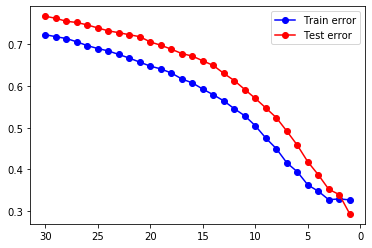

In [36]:
dataDict = {'train':{'data':(X_train, y_train), 'error':[]}, 'test':{'data':(X_test, y_test), 'error':[]}}
for k in range(30,0,-1):
    for key in dataDict:
        X = dataDict[key]['data'][0]
        y = dataDict[key]['data'][1]
        knn = KNeighborsClassifier(n_neighbors = k)
        knn.fit(X, y)
        y_predict = knn.predict(X)
        dataDict[key]['error'].append(np.mean(y != y_predict))
plt.plot(range(30,0,-1), dataDict['train']['error'], '-ob', label="Train error")
plt.plot(range(30,0,-1), dataDict['test']['error'], '-or', label="Test error")
plt.gca().invert_xaxis()
plt.legend()
plt.show()

Несложно заметить, что оптимальным будет значение 2 соседей, тогда ошибка на тестовой выборке будет порядка 33,5%, а на тренировочной - 33,2%.


In [37]:
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_test, y_test)
y_test_predict = knn.predict(X_test)
err_train = np.mean(y_test != y_test_predict)
print(err_train)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_test_predict))

0.33977076464123096
[[175   7   0   2   0   0   0   0   0   3   0   0   0  30   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0]
 [  0 186   0   0   0   0   0   2   0   4   0   0   0   6   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0]
 [  0   3 201   0   0   0   0   0   0   0  14   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0]
 [  1   0   0 189   0   4   0   3   0  12  10   0   0   0   0   0   0   2
    0   0   0   0   2   0   0   0   0   0   0]
 [  2   2   1   1 196   2   0   0   1  18   1   0   0  13   0   0   3   0
    0   0   0   0   2   0   0   0   0   0   0]
 [  0   2   0   1   1 210   0   4   0   2   0   0   0   0   0   0   4  13
    0   0   0   0   0   0   0   2   0   4   0]
 [  7   1   0   2   4   6 204   3   0   0   0   0   0   3   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0]
 [  1   7   0   3   2   5   0 211   0   1   0   0   0   0   0   0   0   0
    0   1   0   0   0   0   0   0   0   0   0]
 [  3   3   

### 8.Применение других классификаторов. 

### Random forest

In [38]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train, y_train)

y_train_predict = rf.predict(X_train)
y_test_predict = rf.predict(X_test)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print(err_train, err_test)
print(confusion_matrix(y_test, y_test_predict))

0.2627721943048576 0.4075993091537133
[[155  19   0   0   0   0   2   0   0   8   0   4   0  22   0   0   0   0
    0   0   0   0   0   2   0   0   3   0   2]
 [  0 198   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0]
 [  0   3 182   0   0   0   0   0   0   0  16   0   0   0   0   0   0   6
    3   0   0   0   0   8   0   0   0   0   0]
 [  0   0   0 118   0   5   0   2   0  17  63   0   0   0   0   4   0   0
    1   0   2   0   4   0   1   0   1   0   5]
 [  0   2   0   4 128   0   5   2   0  32   0   0   0  61   0   0   3   0
    0   0   0   0   2   2   0   1   0   0   0]
 [  0   2   0   0   2 143   0   0   3   2   2   0   0   0   0   1   3  25
    1   0   0   0   4   0   0   0   3  52   0]
 [  1   3   0   3   0   0 187   3   2   0   0   0   3   0   0   4   1   0
    5   8   0   0   6   2   0   0   0   0   2]
 [  1   7   0   1   1   1   1 104  70   1   2   0   0   0   0   7   3   1
    0   0   0   5   1   4   4   5   5   0

### SVC

In [39]:
from sklearn.svm import SVC
svc = SVC(gamma='auto')
svc.fit(X_train, y_train)

y_train_predict = svc.predict(X_train)
y_test_predict = svc.predict(X_test)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))

print(err_train, err_test)
print(confusion_matrix(y_test, y_test_predict))

0.7872696817420436 0.8276024493641074
[[113  20  22   2   0   0   0   0   0   0   0  15   0   5  12   1   3   0
    1   0   2   0  10   7   0   4   0   0   0]
 [ 42  80  36   0   0   2   0   0   0   0   0   0   0   5  12   0   5   0
    4   0   0   0   6   0   2   4   0   0   0]
 [ 33  13 118   0   0   0   0   0   0   0   1   6   0   7  19   1   3   0
    0   0   3   0   0  12   0   2   0   0   0]
 [  7   1   6  63   9  16   3   1   0   3  16  42   0   0   4   8   8   0
    8   0   8   0   9   0   0   5   1   3   2]
 [  3   8   3  30  33   3  12   2   0   2   0  35   0   5   7  14   6   0
   26   0   7   6  10   9   0   8   7   5   1]
 [  2   2   0  38   9  27   8   0   0   0   5  38   0   0  12  17   9   3
    5   4  15  14  11   4   0   2   6   6   6]
 [ 34   3  15  30  14   7  16   0   0   0   4  28   0   0   7   9   6   0
   17   0  10   4  11   4   2   7   2   0   0]
 [ 14   8  24  31  15   3   8   1   0   0   1  21   0   1  18  14   4   0
   15   0   8   2  13  11   2   1   4   4

Несложно заметить, что лучшим из классификаторов является - knn, при k=2.

### 9. Применение PCA

In [40]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(data_stand)
print("Главные компоненты (по строкам):")
print(pca.components_)
print("Дисперсии по главным компонентам,Cобственные значения вдоль каждой компоненты:")
print(pca.explained_variance_)
print("Среднеквадратические отклонения:")
print(np.sqrt(pca.explained_variance_))
print("Соответствующие сингулярные значения:")
print(pca.singular_values_)

Главные компоненты (по строкам):
[[ 0.22973449  0.45020969  0.45546693  0.45178258  0.44749249  0.01782431
   0.00565714 -0.0104041   0.00410547  0.00871728  0.00841146  0.00122849
  -0.00279465 -0.01771199 -0.00384506 -0.00672503  0.00573768 -0.02611208
   0.01673293  0.00495533 -0.01380086 -0.00421407 -0.00177471  0.01409541
   0.0092001   0.01237026  0.00258029 -0.00862813 -0.00125351 -0.0135408
   0.00254562  0.01939855 -0.00746238 -0.00793557 -0.0092695   0.00953362
  -0.005018   -0.12819331 -0.20074115  0.25678965  0.08008499]
 [-0.30678856  0.19238882  0.14012884  0.20648375  0.18495387 -0.03716835
   0.13981463 -0.04736237 -0.1073871   0.01606595 -0.01100339 -0.01298168
  -0.01116674  0.07055285  0.03952575 -0.04629979  0.00791529 -0.00884416
   0.10215504 -0.04289676  0.05643102  0.00393019  0.01033119  0.01067099
   0.04408168 -0.05192883 -0.15220538  0.0123922   0.05766587 -0.03761971
  -0.03276086  0.0554998  -0.04253916  0.0251727  -0.01688973 -0.01959282
   0.02150912  0.

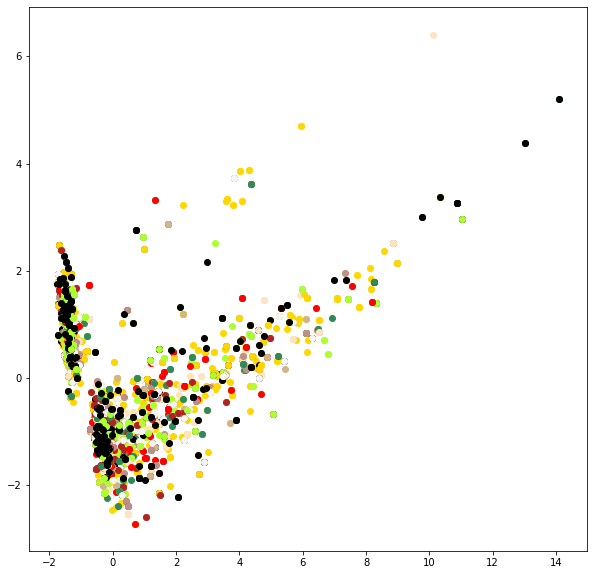

In [63]:
y_p=positionPlayer
plt.figure(figsize=(10,10))
for i in range(5522):
    currentDotColor='black' if y_p[i] == 'defensive-back' else '#ADFF2F' if y_p[i] == 'offensive-line' else '#2E8B57' if y_p[i] == 'defensive-line' else 'whitesmoke' if y_p[i] == 'wide-receiver'else 'rosybrown' if y_p[i] == 'linebacker' else 'firebrick' if y_p[i] == 'cornerback' else 'red' if y_p[i] == 'traditional-linebacker' else 'bisque' if y_p[i] == 'interior-defensive-line' else 'tan' if y_p[i] == 'safety' else 'moccasin' if y_p[i] == 'edge-rusher' else 'gold' 
    plt.scatter(X_pca[i, 0], X_pca[i, 1], c = currentDotColor)    


Применим knn с числом соседей равным двум.

In [43]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(data_stand)
X = X_pca
y = position_col
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

9552 6369


In [44]:
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, y_train)
knn.fit(X_test, y_test)
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)
err_train = np.mean(y_train != y_train_predict)
err_test = np.mean(y_test != y_test_predict)

print(err_train, err_test)

0.5099455611390284 0.33961375412152617


Построим график зависимости ошибки на тестовой и обучающей выборки в зависимости от количества используемых компонент.

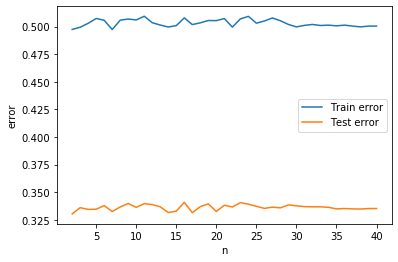

0.4972780569514238 7
0.33035013345894176 2


In [45]:
from sklearn.model_selection import train_test_split
err_train_list = []
err_test_list = []
for n_comp in range(2, 41):
    pca = PCA(n_components=n_comp)
    X_pca = pca.fit_transform(data_stand)
    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size = 0.4, random_state = 42)
    knn = KNeighborsClassifier(n_neighbors = 2)
    knn.fit(X_train, y_train)
    knn.fit(X_test, y_test)
    y_train_predict = knn.predict(X_train)
    y_test_predict = knn.predict(X_test)
    err_train = np.mean(y_train != y_train_predict)
    err_test = np.mean(y_test != y_test_predict)
    
    err_train_list.append(err_train)
    err_test_list.append(err_test)
    
plt.plot(range(2, 41), err_train_list, label="Train error")
plt.plot(range(2, 41), err_test_list, label="Test error")
plt.xlabel('n')
plt.ylabel('error')
plt.legend()
plt.show()
print(min(err_train_list), 2 + err_train_list.index(min(err_train_list)))
print(min(err_test_list), 2 + err_test_list.index(min(err_test_list)))

Ка мы видим, на тестовой и тренировочной выборках ошибки колеблются в районе одного уровня. Тренировачная в районе 0.5, а тестовая в районе 0,33.

### 10. Применение LDA

In [46]:
from sklearn import discriminant_analysis
lda_model = discriminant_analysis.LinearDiscriminantAnalysis()
X = data_stand
y = position_col
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)  
    
N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 
print(N_train, N_test)


lda_model.fit(X_train, y_train)
y_pred = lda_model.predict(X_train)
y_test_pred = lda_model.predict(X_test)
print (np.mean(y_train != y_pred))
print (np.mean(y_test != y_test_pred))

9552 6369


/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


0.88107202680067
0.9024964672633067


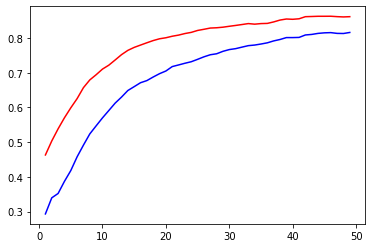

In [47]:
from sklearn import neighbors
err_train = []
err_test = []
k_range = range(1, 50)
for k in k_range:
    knn_model = neighbors.KNeighborsClassifier(n_neighbors = k)
    knn_model.fit(X_train, y_train)
    knn_model.fit(X_test, y_test)
    y_pred      = knn_model.predict(X_train)
    y_test_pred = knn_model.predict(X_test)
    err_train.append(np.mean(y_train != y_pred))
    err_test.append(np.mean(y_test != y_test_pred))
plt.plot(k_range, err_train, 'r')
plt.plot(k_range, err_test, 'b')

In [48]:

print (err_train[2], err_test[2])

0.5385259631490787 0.35233160621761656


ОБщие выводы которые можно сделать после применения PCA и LDA заключаются в том, что улучшить результаты полученные для исходных данных у нас не получилось, а даже наоброт,ошибка увеличилась, и мы не научились предсказывать позицию игрока лучше.